In [238]:
# Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy as sp
import scipy.stats

import matplotlib.pyplot as plt
%matplotlib inline 

In [229]:
# Get data
df = pd.read_csv("data.csv")

In [230]:
# Display data helper function
def display_data(data):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(data)

In [231]:
# Cleanup - Mark questions as 'QX' for easier future reference
columns = df.columns.tolist()
answer = 0
question = 0

for i in range(1, len(columns)):
    # Grid questions have option in '[]'
    if (columns[i].endswith(']')):
        # Check if this is first answer, if so this is a new question
        if (answer == 0):
            question = question + 1
        answer = answer + 1
        columns[i] = 'Q' + str(question) + '-' + str(answer)
    else:
        question = question + 1
        answer = 0    
        columns[i] = 'Q' + str(question)
  
df.columns = columns
display_data(df[1:2])

,Timestamp,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17-1,Q17-2,Q17-3,Q17-4,Q18,Q19-1,Q19-2,Q19-3,Q19-4,Q19-5,Q19-6,Q19-7,Q19-8,Q19-9,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28-1,Q28-2,Q28-3,Q28-4,Q28-5,Q28-6,Q28-7,Q28-8,Q28-9,Q28-10,Q28-11,Q29,Q30,Q31,Q32,Q33
1,2018/06/19 9:03:23 AM GMT+2,2 - 3 godine,UX/UI dizajner,Ženski,26-30,GRAD ZAGREB,GRAD ZAGREB,GRF,UX/UI dizajner,4,2-5 godina,Medium Dizajner,Dizajn studio,2-10,Ima jedan dizajn tim,2-5,Mentoriranje,50%,0,50%,0,4 - 8 sata / tjedno,4,4,5,5,5,3,2,2,4,5,5000kn - 6900kn,4,Najčešće u uredu i povremeno remotely,Educiram se samostalno doma;Edukacija je prisu...,UI dizajn;UX dizajn;Programeri,Research;Analiza konkurencije;Persone;Journey ...,Pomoću analitike,Obavezno uključiti,Obavezno uključiti,Obavezno uključiti,Nisu potrebni,Nisu potrebni,Obavezno uključiti,Nisu potrebni,Obavezno uključiti,Nisu potrebni,Nisu potrebni,Nisu potrebni,NaN,NaN,NaN,"Prilagodljivost, empatija, analitičnost",Machine learning


In [232]:
# Helper columns
salary_descriptive_keys = {'Trenutno nisam zaposlen':0, 'Manje od 2800kn':1, '2800kn - 4900kn':2, '5000kn - 6900kn':3, '7000kn - 8900kn':4, '9000kn - 9900kn':5, '10000kn - 12900kn':6, '13000kn - 15900kn':7, '16000kn - 20000kn':8, '20000kn i više':9, 'Nisam zaposlen ali freelanceam':10}
sorted_salary_descriptive = sorted(salary_descriptive_keys, key=salary_descriptive_keys.get)
df['Q21(I)'] = df['Q21'].replace(salary_descriptive_keys)

# Segmentation

## By Sex

In [233]:
# Segments
# By Sex
female = df[df['Q3']=='Ženski']
male = df[df['Q3']=='Muški']

num_female = len(female)
num_male = len(male)
num_undefined = len(df) - num_female - num_male

print('Survey completed by ', num_female,' females, ', num_male, ' males, and ', num_undefined, ' undefined')

Survey completed by  60  females,  113  males, and  2  undefined


Q21(I)  Q21                             Q3    
0       Trenutno nisam zaposlen         Ženski     1
1       Manje od 2800kn                 Muški      1
                                        Ženski     1
2       2800kn - 4900kn                 Muški     10
                                        Ženski     9
3       5000kn - 6900kn                 Muški     21
                                        Ženski    16
4       7000kn - 8900kn                 Muški     21
                                        Ženski    12
5       9000kn - 9900kn                 Muški      4
                                        Ženski     6
6       10000kn - 12900kn               Muški     19
                                        Ženski     5
7       13000kn - 15900kn               Muški      9
                                        Ženski     3
8       16000kn - 20000kn               Muški      8
9       20000kn i više                  Muški     13
                                        Ženski     1

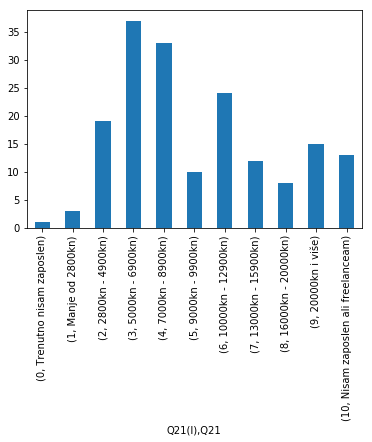

In [234]:
# Salary
# General
salary_general = df.groupby(['Q21(I)', 'Q21']).count().iloc[:,1]
salary_general_with_sex = df[df.Q3 != "N/A OR OTHER"].groupby(['Q21(I)', 'Q21', 'Q3']).count().iloc[:,1]
display(salary_general_with_sex)
salary_general.plot(kind='bar', label='Q21')

In [235]:
# By Sex
salary_female = female.groupby(['Q21(I)']).count().iloc[:,1].reset_index(name='Q3(count)')
salary_male = male.groupby(['Q21(I)']).count().iloc[:,1].reset_index(name='Q3(count)')

In [236]:
salary_female_df = DataFrame(salary_female)
salary_male_df = DataFrame(salary_male)

salary_female_df['Q3(rel)'] = (salary_female_df['Q3(count)'] / salary_female_df['Q3(count)'].sum()) * 100
salary_male_df['Q3(rel)'] = (salary_male_df['Q3(count)'] / salary_male_df['Q3(count)'].sum()) * 100

salary_sex_compared_df = pd.merge(salary_female_df, salary_male_df, on='Q21(I)', how='outer', suffixes=('_female', '_male'))
salary_sex_compared_df.fillna(0, inplace=True)
salary_sex_compared_df.sort_values(by=['Q21(I)'], inplace=True)
salary_sex_compared_df.style.format({'Q3(rel)_female':'{:,.2f}%'.format})

display(salary_sex_compared_df)

,Q21(I),Q3(count)_female,Q3(rel)_female,Q3(count)_male,Q3(rel)_male
0,0,1.0,1.666667,0.0,0.000000
1,1,1.0,1.666667,1.0,0.884956
2,2,9.0,15.000000,10.0,8.849558
3,3,16.0,26.666667,21.0,18.584071
4,4,12.0,20.000000,21.0,18.584071
5,5,6.0,10.000000,4.0,3.539823
6,6,5.0,8.333333,19.0,16.814159
7,7,3.0,5.000000,9.0,7.964602
10,8,0.0,0.000000,8.0,7.079646
8,9,1.0,1.666667,13.0,11.504425


,Q21(I),Q3(rel)_female,Q3(rel)_male
0,0,1.666667,0.000000
1,1,1.666667,0.884956
2,2,15.000000,8.849558
3,3,26.666667,18.584071
4,4,20.000000,18.584071
5,5,10.000000,3.539823
6,6,8.333333,16.814159
7,7,5.000000,7.964602
10,8,0.000000,7.079646
8,9,1.666667,11.504425


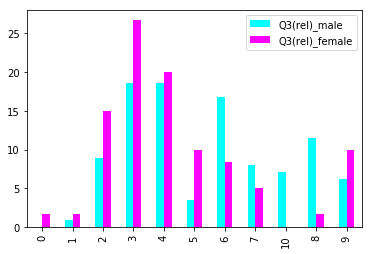

In [237]:
display(salary_sex_compared_df[['Q21(I)', 'Q3(rel)_female', 'Q3(rel)_male']])
salary_sex_compared_df[['Q3(rel)_male', 'Q3(rel)_female']].plot(kind='bar', colormap='cool')

In [240]:
sp.stats.wilcoxon(salary_sex_compared_df['Q3(rel)_female'], salary_sex_compared_df['Q3(rel)_male'])

WilcoxonResult(statistic=33.0, pvalue=1.0)